## PART A (Random points) 

5 Points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
# generate the data
def generate_data(r):
    x1_1 = []
    x1_2 = []
    x2_1 = []
    x2_2 = []
    for i in range(r):
        x1_1.append(np.random.uniform(0,1))
        x1_2.append(np.random.uniform(0,1))
        x2_1.append(np.random.uniform(-1,0))
        x2_2.append(np.random.uniform(-1,0))
        
    data1 = [np.array([1,x1_1[i],x1_2[i],1]) for i in range(r)]
    data2 = [np.array([1,x2_1[i],x2_2[i],0]) for i in range(r)]
    data = data1 + data2

    data = np.array(data)
    np.random.shuffle(data)
    return data

data = generate_data(1000)

In [3]:
data.shape

(2000, 4)

In [4]:
# Random dataset for PART A
# [x1, x2, x3, Y]
data

array([[ 1.        , -0.57659042, -0.63269854,  0.        ],
       [ 1.        , -0.29685369, -0.00777409,  0.        ],
       [ 1.        , -0.37350935, -0.53815548,  0.        ],
       ...,
       [ 1.        , -0.82231636, -0.06238733,  0.        ],
       [ 1.        ,  0.38415378,  0.17600847,  1.        ],
       [ 1.        ,  0.67396398,  0.31730142,  1.        ]])

In [5]:
############### Functions ###############
def genWeight(n, a, b):
    """This function generates n uniformly distributed weights from a to b then transpose the matrix
        n = number of weights
        a = lower bound of uniformly distributed interval
        b = upper bound of uniformly distributed interval
    """
    w = []
    for i in range(n):                    # n feature columns, n weights, no noise
        w.append(random.uniform(a,b))     # randomly generate uniformly distributed w's
    w = np.reshape(w, (n, 1))             # reshape it to n by 1 to do dot product w/ x
    return w
# end of genWeight()
    
def H(X, w):  # Hypothesis function:  H(X)= 1/(1+exp{transpose(w)X}
    """This func returns a list of values of a logistic regression H function, H(X)
        X = the predictor matrix.
        p = vector of dot product of X and w
        w = weight
        r = number of observations
        n,a,b see genWeights()
    """
    r = X.shape[0]
    h = []                   
    for i in range(r):          # iterations depends on number of observations
        p = X[i].dot(w)         # ith obs. dot weight
        h.append( 1 / (1 + math.e**(-p)) )    # list of probability from H function
    return h
#end of H()


def costF(X, y, w, h):
    """gradient descend for logistic function: 
        X = predictor matrix    m by # of feature cols
        y = response matrix   m by 1
        m = number of observations
        cost(w) = J(w) = (-1/m)*sum( y_i*log(h_w(x_i)) + (1-y_i)log(1 - h_w(x_i)) )
    """
        #cost += y[i]*math.log(H(X)[i], math.e) + (1-y[i])*math.log((1 - H(X)[i]), math.e)
    r = X.shape[0]
    cost = 0                     # initialize cost variable
    for i in range(r):
        if y[i] == 1:            # calculate cost if y = 1
            cost += math.log(h[i])        # log(h_w(x_i)) if y = 1
        elif y[i] == 0:          # calculate cost if y = 0
            cost += math.log((1 - h[i]))  # log(1 - h_w(x_i)) if y = 0
        else:
            pass

    return -1*cost/r                # returns the average cost
# end of costF()

def dCostF(X, y, w, h):
    """This function returns the partial derivative of the cost function with respect to 
        each weight, theta_i, in the n by 1 W matrix.
        X = predictor matrix    m by # of feature cols
        y = response matrix   m by 1
        h = H(X)
        r = number of observations
        c = number of features
        partial derivative:  (h_theta(x_i) - y_i) * x_i_j
    """
    r = X.shape[0]
    c = X.shape[1]
    value = 0
    for i in range(r):
        for j in range(c):
            value += (h[i] - y[i]) * X[i][j]  # partial derivative of theta_j 
    
    return float(value/r)      # return the average
# end of dCostf()

def gradDLogistic(X, y, w, h, alpha, runs):
    """This function performs gradient descend to estimate weight for logistic regression
        w = weight
        n, a, b:  see genWeight()
        alpha = learning rate
        X, y: X predictor and response matrix, respectively. see costF() and dCostF()        
        GradientDescend: theta_j := theta_j - alpha * partial_w_j ( J(theta) )
    """
    theta = w
    for i in range(runs):                           # number of iterations for gradient descend
        h = H(X, theta)                             # update hypothesis function, H(X)
        h_range = (min(h), max(h))                  # update interval of probabilities from H(X)
        j = costF(X, y, theta, h)                   # update cost function
        dj = dCostF(X, y, theta, h)                 # update partial derivatives
        theta = theta - alpha * dj                  # update weight
        print("iteration: {} , J(W): {}, dJ(W): {}\nprobability range: {} \nw: \n{}".format(i,j,dj,h_range,theta))

    return theta                                    # return list of approximated weights
# end of gradDLogistic()

############### End of Functions ############### 

In [6]:
############### main() ############### 
X = np.array(data[:, 1:3])  # since X1_i = 1 for all i and y = 0,1, X1 is not selected
y = np.array(data[:,3])     # resposne col

w = genWeight(2, -1, 1)     # generate a 2 by 1 weight matrix randomly and uniformly from -1 to 1
h = H(X, w)                 # list of probabilities from hypothesis function using random weights
print("The current range of probabilities from Hypothesis function:", min(h), max(h))

The current range of probabilities from Hypothesis function: [0.27580911] [0.72593321]


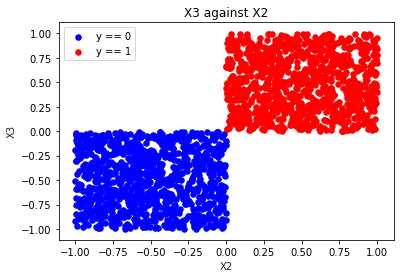

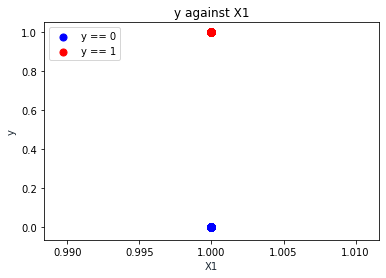

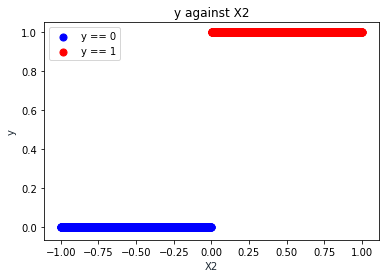

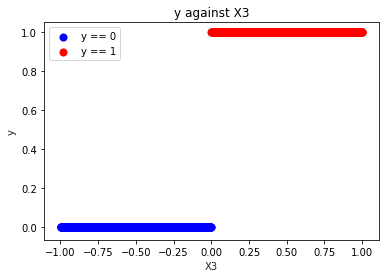

In [7]:
### plot to explore data
# scatter plot of X2 vs X3 categorized by y value
plt.scatter(data[y==0, 1], data[y==0, 2], s = 30, c = 'blue', label = 'y == 0')
plt.scatter(data[y==1, 1], data[y==1, 2], s = 30, c = 'r', label = 'y == 1')
plt.title('X3 against X2')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('X3', color='#1C2833')
plt.legend(loc=2)
plt.show()    

plt.scatter(data[y==0, 0], data[y==0, 3], s = 50, c = 'blue', label = 'y == 0')
plt.scatter(data[y==1, 0], data[y==1, 3], s = 50, c = 'red', label = 'y == 1')
plt.title('y against X1')
plt.xlabel('X1', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc=2)
plt.show()

plt.scatter(data[y==0, 1], data[y==0, 3], s = 50, c = 'blue', label = 'y == 0')
plt.scatter(data[y==1, 1], data[y==1, 3], s = 50, c = 'red', label = 'y == 1')
plt.title('y against X2')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc=2)
plt.show()

plt.scatter(data[y==0, 2], data[y==0, 3], s = 50, c = 'blue', label = 'y == 0')
plt.scatter(data[y==1, 2], data[y==1, 3], s = 50, c = 'red', label = 'y == 1')
plt.title('y against X3')
plt.xlabel('X3', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc=2)
plt.show()

These plots of data show that the data is linearly separated and 100% accuracy can be achieved.
X1 is not helpful.

In [8]:
# Perform logistic regression
# 1. Compute cost function
print(costF(X,y,w,h))         # 1st cost()
print(dCostF(X,y,w,h))        # 1st dCostF()

# 2. Compute Gradient function
theta = gradDLogistic(X,y,w,h,0.01,1000) #1000 iterations to approximate the optimal weight parameters, theta
print(theta)

0.8295400241933799
-0.5626611822389915
iteration: 0 , J(W): 0.8295400241933799, dJ(W): -0.5626611822389915
probability range: (array([0.27580911]), array([0.72593321])) 
w: 
[[-0.98500786]
 [ 0.54386677]]
iteration: 1 , J(W): 0.826378517103238, dJ(W): -0.5611079395934951
probability range: (array([0.27694947]), array([0.7247857])) 
w: 
[[-0.97939678]
 [ 0.54947785]]
iteration: 2 , J(W): 0.8232344453823756, dJ(W): -0.5595573535289355
probability range: (array([0.27808959]), array([0.7236384])) 
w: 
[[-0.97380121]
 [ 0.55507342]]
iteration: 3 , J(W): 0.8201077309887658, dJ(W): -0.5580094677195166
probability range: (array([0.27922942]), array([0.72249133])) 
w: 
[[-0.96822111]
 [ 0.56065352]]
iteration: 4 , J(W): 0.816998295643076, dJ(W): -0.5564643252256456
probability range: (array([0.28036894]), array([0.72134451])) 
w: 
[[-0.96265647]
 [ 0.56621816]]
iteration: 5 , J(W): 0.8139060608404579, dJ(W): -0.5549219684917223
probability range: (array([0.28150813]), array([0.72019798])) 
w: 


iteration: 55 , J(W): 0.6794580992126223, dJ(W): -0.4821125737426706
probability range: (array([0.31080502]), array([0.68945636])) 
w: 
[[-0.69859101]
 [ 0.83028362]]
iteration: 56 , J(W): 0.6771370485898431, dJ(W): -0.4807541408809518
probability range: (array([0.30976152]), array([0.69051415])) 
w: 
[[-0.69378347]
 [ 0.83509116]]
iteration: 57 , J(W): 0.6748290586587736, dJ(W): -0.47939986351269304
probability range: (array([0.30872289]), array([0.69156698])) 
w: 
[[-0.68898947]
 [ 0.83988516]]
iteration: 58 , J(W): 0.6725340527267016, dJ(W): -0.47804975311607534
probability range: (array([0.30768911]), array([0.69261487])) 
w: 
[[-0.68420897]
 [ 0.84466566]]
iteration: 59 , J(W): 0.6702519543300607, dJ(W): -0.47670382068360384
probability range: (array([0.30666015]), array([0.69365783])) 
w: 
[[-0.67944193]
 [ 0.84943269]]
iteration: 60 , J(W): 0.6679826872392085, dJ(W): -0.4753620767273193
probability range: (array([0.30563601]), array([0.69469588])) 
w: 
[[-0.67468831]
 [ 0.854186

iteration: 107 , J(W): 0.5744591769085906, dJ(W): -0.4171203687304222
probability range: (array([0.26257247]), array([0.73831174])) 
w: 
[[-0.46561731]
 [ 1.06325732]]
iteration: 108 , J(W): 0.572721653372577, dJ(W): -0.41598396207367283
probability range: (array([0.26175643]), array([0.73913753])) 
w: 
[[-0.46145747]
 [ 1.06741716]]
iteration: 109 , J(W): 0.5709935820423879, dJ(W): -0.41485178243597903
probability range: (array([0.26094425]), array([0.7399594])) 
w: 
[[-0.45730895]
 [ 1.07156568]]
iteration: 110 , J(W): 0.5692749021037459, dJ(W): -0.4137238231206278
probability range: (array([0.26013591]), array([0.74077735])) 
w: 
[[-0.45317171]
 [ 1.07570292]]
iteration: 111 , J(W): 0.5675655530849658, dJ(W): -0.41260007721581987
probability range: (array([0.25933138]), array([0.74159141])) 
w: 
[[-0.44904571]
 [ 1.07982892]]
iteration: 112 , J(W): 0.5658654748570193, dJ(W): -0.4114805375991589
probability range: (array([0.25853065]), array([0.7424016])) 
w: 
[[-0.44493091]
 [ 1.083

iteration: 157 , J(W): 0.49804831437417746, dJ(W): -0.3653061142173147
probability range: (array([0.2261266]), array([0.77516135])) 
w: 
[[-0.27068707]
 [ 1.25818756]]
iteration: 158 , J(W): 0.4967155398197734, dJ(W): -0.36436957435583006
probability range: (array([0.22548071]), array([0.77581373])) 
w: 
[[-0.26704337]
 [ 1.26183126]]
iteration: 159 , J(W): 0.4953895878308234, dJ(W): -0.3634367404470104
probability range: (array([0.22483779]), array([0.7764631])) 
w: 
[[-0.263409  ]
 [ 1.26546563]]
iteration: 160 , J(W): 0.4940704140030163, dJ(W): -0.362507599627128
probability range: (array([0.22419781]), array([0.77710947])) 
w: 
[[-0.25978393]
 [ 1.2690907 ]]
iteration: 161 , J(W): 0.49275797423236206, dJ(W): -0.3615821389852257
probability range: (array([0.22356076]), array([0.77775286])) 
w: 
[[-0.2561681 ]
 [ 1.27270652]]
iteration: 162 , J(W): 0.49145222471376565, dJ(W): -0.3606603455653685
probability range: (array([0.22292662]), array([0.77839328])) 
w: 
[[-0.2525615 ]
 [ 1.27

iteration: 210 , J(W): 0.4358561846395387, dJ(W): -0.3204667242398369
probability range: (array([0.1954314]), array([0.80594818])) 
w: 
[[-0.08959915]
 [ 1.43927548]]
iteration: 211 , J(W): 0.43483041096484876, dJ(W): -0.3197083205295378
probability range: (array([0.19486343]), array([0.80646175])) 
w: 
[[-0.08640206]
 [ 1.44247256]]
iteration: 212 , J(W): 0.43380948472627595, dJ(W): -0.31895291811800286
probability range: (array([0.19429805]), array([0.80697308])) 
w: 
[[-0.08321253]
 [ 1.44566209]]
iteration: 213 , J(W): 0.43279337532983087, dJ(W): -0.3182005039285993
probability range: (array([0.19373525]), array([0.80748217])) 
w: 
[[-0.08003053]
 [ 1.4488441 ]]
iteration: 214 , J(W): 0.4317820524004047, dJ(W): -0.31745106491177455
probability range: (array([0.19317501]), array([0.80798905])) 
w: 
[[-0.07685602]
 [ 1.45201861]]
iteration: 215 , J(W): 0.43077548578026686, dJ(W): -0.3167045880457733
probability range: (array([0.19261731]), array([0.80849371])) 
w: 
[[-0.07368897]
 [ 

iteration: 259 , J(W): 0.3907738026973133, dJ(W): -0.28660041058542723
probability range: (array([0.16515508]), array([0.83534491])) 
w: 
[[0.05869791]
 [1.58757254]]
iteration: 260 , J(W): 0.3899533021933702, dJ(W): -0.2859743111479847
probability range: (array([0.16443291]), array([0.8360912])) 
w: 
[[0.06155765]
 [1.59043228]]
iteration: 261 , J(W): 0.38913638118037114, dJ(W): -0.28535061384541716
probability range: (array([0.16371484]), array([0.83684893])) 
w: 
[[0.06441116]
 [1.59328579]]
iteration: 262 , J(W): 0.38832301814782777, dJ(W): -0.28472930748238845
probability range: (array([0.16300085]), array([0.83760218])) 
w: 
[[0.06725845]
 [1.59613308]]
iteration: 263 , J(W): 0.38751319173861365, dJ(W): -0.2841103809086045
probability range: (array([0.16229092]), array([0.83835101])) 
w: 
[[0.07009956]
 [1.59897419]]
iteration: 264 , J(W): 0.3867068807477993, dJ(W): -0.2834938230188986
probability range: (array([0.16158502]), array([0.83909542])) 
w: 
[[0.0729345 ]
 [1.60180912]]

iteration: 313 , J(W): 0.35110052113699003, dJ(W): -0.25596519611754665
probability range: (array([0.13143569]), array([0.87072599])) 
w: 
[[0.20475816]
 [1.73363278]]
iteration: 314 , J(W): 0.350445993845218, dJ(W): -0.2554539199968318
probability range: (array([0.13090165]), array([0.87128307])) 
w: 
[[0.2073127 ]
 [1.73618732]]
iteration: 315 , J(W): 0.34979407763014875, dJ(W): -0.25494450645868616
probability range: (array([0.13037051]), array([0.87183699])) 
w: 
[[0.20986214]
 [1.73873677]]
iteration: 316 , J(W): 0.34914475779207427, dJ(W): -0.25443694674034456
probability range: (array([0.12983833]), array([0.87238777])) 
w: 
[[0.21240651]
 [1.74128114]]
iteration: 317 , J(W): 0.34849801973261146, dJ(W): -0.25393123212204444
probability range: (array([0.1292743]), array([0.87293545])) 
w: 
[[0.21494582]
 [1.74382045]]
iteration: 318 , J(W): 0.3478538489539228, dJ(W): -0.2534273539268975
probability range: (array([0.12871348]), array([0.87348003])) 
w: 
[[0.2174801 ]
 [1.74635472]

iteration: 369 , J(W): 0.318095000670762, dJ(W): -0.22997446628597693
probability range: (array([0.10390523]), array([0.89759082])) 
w: 
[[0.34045083]
 [1.86932546]]
iteration: 370 , J(W): 0.31756660041972684, dJ(W): -0.2295551399838589
probability range: (array([0.10348507]), array([0.89799957])) 
w: 
[[0.34274638]
 [1.87162101]]
iteration: 371 , J(W): 0.31704012457126274, dJ(W): -0.22913724775866323
probability range: (array([0.10306718]), array([0.89840614])) 
w: 
[[0.34503775]
 [1.87391238]]
iteration: 372 , J(W): 0.31651556305323775, dJ(W): -0.2287207830266835
probability range: (array([0.10265154]), array([0.89881054])) 
w: 
[[0.34732496]
 [1.87619959]]
iteration: 373 , J(W): 0.31599290585947015, dJ(W): -0.22830573923855121
probability range: (array([0.10223814]), array([0.89921277])) 
w: 
[[0.34960802]
 [1.87848265]]
iteration: 374 , J(W): 0.3154721430492274, dJ(W): -0.22789210987907393
probability range: (array([0.10182696]), array([0.89961286])) 
w: 
[[0.35188694]
 [1.88076157

iteration: 423 , J(W): 0.29208475906932607, dJ(W): -0.20923005425860094
probability range: (array([0.08412739]), array([0.91685157])) 
w: 
[[0.45876497]
 [1.9876396 ]]
iteration: 424 , J(W): 0.2916473536899047, dJ(W): -0.20887954743275536
probability range: (array([0.08381103]), array([0.91716002])) 
w: 
[[0.46085376]
 [1.98972839]]
iteration: 425 , J(W): 0.29121141202476497, dJ(W): -0.20853016431604338
probability range: (array([0.08349629]), array([0.91746691])) 
w: 
[[0.46293906]
 [1.99181369]]
iteration: 426 , J(W): 0.2907769269413397, dJ(W): -0.20818189995160127
probability range: (array([0.08318314]), array([0.91777226])) 
w: 
[[0.46502088]
 [1.99389551]]
iteration: 427 , J(W): 0.2903438913511794, dJ(W): -0.20783474940852945
probability range: (array([0.08287158]), array([0.91807607])) 
w: 
[[0.46709923]
 [1.99597386]]
iteration: 428 , J(W): 0.2899122982096261, dJ(W): -0.20748870778176137
probability range: (array([0.08256161]), array([0.91837835])) 
w: 
[[0.46917412]
 [1.9980487

iteration: 476 , J(W): 0.270764238353405, dJ(W): -0.19209275683991145
probability range: (array([0.06936261]), array([0.93126255])) 
w: 
[[0.56490498]
 [2.09377961]]
iteration: 477 , J(W): 0.27039552761219315, dJ(W): -0.19179554473773686
probability range: (array([0.06911926]), array([0.93150036])) 
w: 
[[0.56682293]
 [2.09569756]]
iteration: 478 , J(W): 0.27002795653442757, dJ(W): -0.19149922628243907
probability range: (array([0.06887708]), array([0.93173703])) 
w: 
[[0.56873793]
 [2.09761255]]
iteration: 479 , J(W): 0.26966151993834214, dJ(W): -0.1912037977129464
probability range: (array([0.06863605]), array([0.93197258])) 
w: 
[[0.57064996]
 [2.09952459]]
iteration: 480 , J(W): 0.26929621267238957, dJ(W): -0.19090925528750127
probability range: (array([0.06839618]), array([0.93220702])) 
w: 
[[0.57255906]
 [2.10143368]]
iteration: 481 , J(W): 0.26893202961502677, dJ(W): -0.19061559528355257
probability range: (array([0.06815745]), array([0.93244035])) 
w: 
[[0.57446521]
 [2.103339

iteration: 527 , J(W): 0.25331223782076007, dJ(W): -0.17800059560762618
probability range: (array([0.05830489]), array([0.94207937])) 
w: 
[[0.65911905]
 [2.18799367]]
iteration: 528 , J(W): 0.25299562364322575, dJ(W): -0.177744540410326
probability range: (array([0.05811307]), array([0.94226723])) 
w: 
[[0.66089649]
 [2.18977112]]
iteration: 529 , J(W): 0.25267991939777734, dJ(W): -0.17748920953944075
probability range: (array([0.05792213]), array([0.94245424])) 
w: 
[[0.66267138]
 [2.19154601]]
iteration: 530 , J(W): 0.25236512120728843, dJ(W): -0.1772346000914571
probability range: (array([0.05773204]), array([0.94264041])) 
w: 
[[0.66444373]
 [2.19331836]]
iteration: 531 , J(W): 0.2520512252159839, dJ(W): -0.17698070917731953
probability range: (array([0.05754281]), array([0.94282576])) 
w: 
[[0.66621354]
 [2.19508816]]
iteration: 532 , J(W): 0.25173822758930237, dJ(W): -0.17672753392234422
probability range: (array([0.05735443]), array([0.94301027])) 
w: 
[[0.66798081]
 [2.1968554

iteration: 581 , J(W): 0.2374273488993163, dJ(W): -0.1651424315670925
probability range: (array([0.04907558]), array([0.95112771])) 
w: 
[[0.75161755]
 [2.28049218]]
iteration: 582 , J(W): 0.2371548109986574, dJ(W): -0.16492166916051312
probability range: (array([0.04892431]), array([0.95127619])) 
w: 
[[0.75326677]
 [2.2821414 ]]
iteration: 583 , J(W): 0.23688300102807494, dJ(W): -0.16470149308863782
probability range: (array([0.04877369]), array([0.95142405])) 
w: 
[[0.75491378]
 [2.28378841]]
iteration: 584 , J(W): 0.2366119160852209, dJ(W): -0.16448190112251318
probability range: (array([0.0486237]), array([0.95157128])) 
w: 
[[0.7565586 ]
 [2.28543323]]
iteration: 585 , J(W): 0.23634155328280543, dJ(W): -0.1642628910438504
probability range: (array([0.04847435]), array([0.9517179])) 
w: 
[[0.75820123]
 [2.28707586]]
iteration: 586 , J(W): 0.23607190974849548, dJ(W): -0.16404446064496106
probability range: (array([0.04832564]), array([0.95186389])) 
w: 
[[0.75984168]
 [2.2887163 ]]

iteration: 635 , J(W): 0.2236844592156836, dJ(W): -0.15400821324104746
probability range: (array([0.04174913]), array([0.95832661])) 
w: 
[[0.83766272]
 [2.36653735]]
iteration: 636 , J(W): 0.22344742183026076, dJ(W): -0.15381617009474444
probability range: (array([0.04162818]), array([0.95844559])) 
w: 
[[0.83920088]
 [2.36807551]]
iteration: 637 , J(W): 0.2232109750468646, dJ(W): -0.1536246068147743
probability range: (array([0.04150773]), array([0.95856409])) 
w: 
[[0.84073713]
 [2.36961176]]
iteration: 638 , J(W): 0.22297511665620967, dJ(W): -0.15343352167138594
probability range: (array([0.04138775]), array([0.95868213])) 
w: 
[[0.84227146]
 [2.37114609]]
iteration: 639 , J(W): 0.22273984445981843, dJ(W): -0.1532429129427471
probability range: (array([0.04126825]), array([0.95879969])) 
w: 
[[0.84380389]
 [2.37267852]]
iteration: 640 , J(W): 0.22250515626995576, dJ(W): -0.1530527789149106
probability range: (array([0.04114924]), array([0.95891679])) 
w: 
[[0.84533442]
 [2.37420905

iteration: 685 , J(W): 0.212515134758591, dJ(W): -0.1449617270740713
probability range: (array([0.03625144]), array([0.9637399])) 
w: 
[[0.91231407]
 [2.44118869]]
iteration: 686 , J(W): 0.21230511899399487, dJ(W): -0.1447917042629175
probability range: (array([0.03615202]), array([0.96383789])) 
w: 
[[0.91376198]
 [2.44263661]]
iteration: 687 , J(W): 0.21209559544042766, dJ(W): -0.14462208375395758
probability range: (array([0.03605298]), array([0.96393552])) 
w: 
[[0.9152082 ]
 [2.44408283]]
iteration: 688 , J(W): 0.21188656235812575, dJ(W): -0.1444528641658795
probability range: (array([0.03595431]), array([0.96403278])) 
w: 
[[0.91665273]
 [2.44552736]]
iteration: 689 , J(W): 0.21167801801539782, dJ(W): -0.1442840441234397
probability range: (array([0.03585602]), array([0.96412968])) 
w: 
[[0.91809557]
 [2.4469702 ]]
iteration: 690 , J(W): 0.21146996068857785, dJ(W): -0.1441156222574317
probability range: (array([0.0357581]), array([0.96422621])) 
w: 
[[0.91953673]
 [2.44841136]]
i

iteration: 737 , J(W): 0.2022106105681469, dJ(W): -0.13662503083002142
probability range: (array([0.03154576]), array([0.96838247])) 
w: 
[[0.98544161]
 [2.51431624]]
iteration: 738 , J(W): 0.20202404961843992, dJ(W): -0.13647422211082286
probability range: (array([0.03146381]), array([0.9684634])) 
w: 
[[0.98680636]
 [2.51568099]]
iteration: 739 , J(W): 0.2018379001818673, dJ(W): -0.13632375125951174
probability range: (array([0.03138216]), array([0.96854404])) 
w: 
[[0.98816959]
 [2.51704422]]
iteration: 740 , J(W): 0.2016521608838934, dJ(W): -0.13617361717211837
probability range: (array([0.03130081]), array([0.96862439])) 
w: 
[[0.98953133]
 [2.51840596]]
iteration: 741 , J(W): 0.20146683035602883, dJ(W): -0.1360238187493139
probability range: (array([0.03121975]), array([0.96870446])) 
w: 
[[0.99089157]
 [2.5197662 ]]
iteration: 742 , J(W): 0.20128190723580328, dJ(W): -0.1358743548963881
probability range: (array([0.03113898]), array([0.96878424])) 
w: 
[[0.99225031]
 [2.52112494]

iteration: 789 , J(W): 0.19302628705058583, dJ(W): -0.12920779113511216
probability range: (array([0.02764904]), array([0.97223436])) 
w: 
[[1.05448453]
 [2.58335916]]
iteration: 790 , J(W): 0.19285942749470147, dJ(W): -0.12907318427613018
probability range: (array([0.02758084]), array([0.97230184])) 
w: 
[[1.05577526]
 [2.58464989]]
iteration: 791 , J(W): 0.19269291532740582, dJ(W): -0.1289388635514999
probability range: (array([0.02751287]), array([0.9723691])) 
w: 
[[1.05706465]
 [2.58593928]]
iteration: 792 , J(W): 0.1925267494495934, dJ(W): -0.12880482807037497
probability range: (array([0.02744514]), array([0.97243612])) 
w: 
[[1.0583527 ]
 [2.58722733]]
iteration: 793 , J(W): 0.19236092876675526, dJ(W): -0.12867107694549781
probability range: (array([0.02737764]), array([0.97250292])) 
w: 
[[1.05963941]
 [2.58851404]]
iteration: 794 , J(W): 0.1921954521889533, dJ(W): -0.12853760929317834
probability range: (array([0.02731037]), array([0.97256949])) 
w: 
[[1.06092479]
 [2.5897994

iteration: 842 , J(W): 0.18463696528011794, dJ(W): -0.12244805412463641
probability range: (array([0.02433466]), array([0.97551675])) 
w: 
[[1.1211067 ]
 [2.64998133]]
iteration: 843 , J(W): 0.18448710386342332, dJ(W): -0.1223274639796618
probability range: (array([0.02427758]), array([0.97557333])) 
w: 
[[1.12232998]
 [2.6512046 ]]
iteration: 844 , J(W): 0.18433753740019942, dJ(W): -0.12220711731496123
probability range: (array([0.02422068]), array([0.97562973])) 
w: 
[[1.12355205]
 [2.65242667]]
iteration: 845 , J(W): 0.1841882650053887, dJ(W): -0.12208701340787395
probability range: (array([0.02416397]), array([0.97568595])) 
w: 
[[1.12477292]
 [2.65364755]]
iteration: 846 , J(W): 0.18403928579745252, dJ(W): -0.12196715153852404
probability range: (array([0.02410745]), array([0.97574199])) 
w: 
[[1.12599259]
 [2.65486722]]
iteration: 847 , J(W): 0.18389059889835163, dJ(W): -0.12184753098980595
probability range: (array([0.02405111]), array([0.97579785])) 
w: 
[[1.12721106]
 [2.65608

iteration: 894 , J(W): 0.17721662974812608, dJ(W): -0.11648497196547797
probability range: (array([0.0215976]), array([0.97823226])) 
w: 
[[1.18317296]
 [2.71204758]]
iteration: 895 , J(W): 0.17708100565650794, dJ(W): -0.11637614273183326
probability range: (array([0.02154926]), array([0.97828025])) 
w: 
[[1.18433672]
 [2.71321135]]
iteration: 896 , J(W): 0.17694563480479727, dJ(W): -0.11626752282257737
probability range: (array([0.02150108]), array([0.9783281])) 
w: 
[[1.18549939]
 [2.71437402]]
iteration: 897 , J(W): 0.1768105164700514, dJ(W): -0.1161591116440314
probability range: (array([0.02145305]), array([0.9783758])) 
w: 
[[1.18666098]
 [2.71553561]]
iteration: 898 , J(W): 0.17667564993207024, dJ(W): -0.11605090860470979
probability range: (array([0.02140517]), array([0.97842335])) 
w: 
[[1.18782149]
 [2.71669612]]
iteration: 899 , J(W): 0.17654103447337924, dJ(W): -0.11594291311530994
probability range: (array([0.02135744]), array([0.97847076])) 
w: 
[[1.18898092]
 [2.71785555

iteration: 950 , J(W): 0.16999258975293188, dJ(W): -0.1106972069536503
probability range: (array([0.01910753]), array([0.98070708])) 
w: 
[[1.24672662]
 [2.77560124]]
iteration: 951 , J(W): 0.1698701052669057, dJ(W): -0.11059924296775155
probability range: (array([0.01906679]), array([0.98074761])) 
w: 
[[1.24783261]
 [2.77670724]]
iteration: 952 , J(W): 0.16974783742458988, dJ(W): -0.11050145818152445
probability range: (array([0.01902617]), array([0.98078802])) 
w: 
[[1.24893762]
 [2.77781225]]
iteration: 953 , J(W): 0.16962578563854203, dJ(W): -0.11040385211022544
probability range: (array([0.01898567]), array([0.98082831])) 
w: 
[[1.25004166]
 [2.77891629]]
iteration: 954 , J(W): 0.1695039493234361, dJ(W): -0.11030642427082316
probability range: (array([0.01894529]), array([0.98086848])) 
w: 
[[1.25114473]
 [2.78001935]]
iteration: 955 , J(W): 0.16938232789605837, dJ(W): -0.11020917418199234
probability range: (array([0.01890503]), array([0.98090854])) 
w: 
[[1.25224682]
 [2.781121

In [9]:
# Plot your hypothesis function that classifies the dataset

z = X.dot(theta)              # vector of values Theta*X
print("range of z", min(z), max(z))         
h_final = 1/(1+math.e**(-z))  # a list of probabilities produced by H(W, theta) 


# plot hypothesis function using approximated weight parameters
print("probability = 0.5 in H(X,theta) with approximated theta is: " + str(0.5 in h_final))
pred = []
for prob in h_final:
    if prob > 0.5:            # since 0.5 Not in H(X, theta), >0.5 is 1 and <0.5 is 0
        pred.append(1)        # > 0.5, it's 1
    else:
        pred.append(0)        # < 0.5, it's 0

pred = np.reshape(pred, (len(pred)))
print('\n')
correct = list(pred - y).count(0) # number of correct prediction  # 0-0 and 1-1 are correct predictions
print("The number of correct prediction is:", correct, "out of", data.shape[0], "observations.")
print("The accuracy is " + str(int(correct/data.shape[0]*100)) + "%.")


range of z [-4.04488732] [4.03348926]
probability = 0.5 in H(X,theta) with approximated theta is: False


The number of correct prediction is: 2000 out of 2000 observations.
The accuracy is 100%.


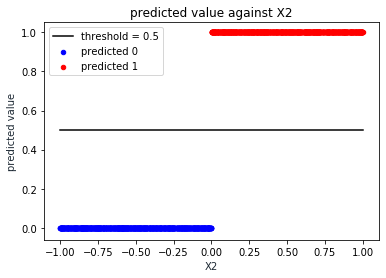

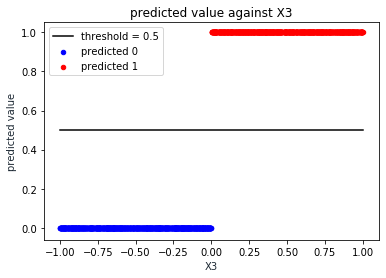

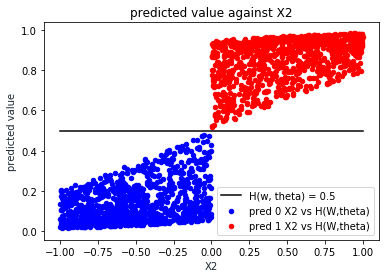

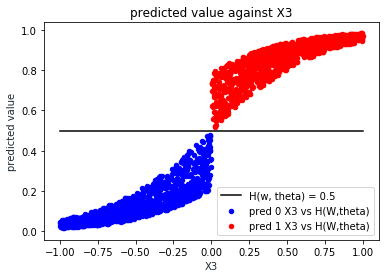

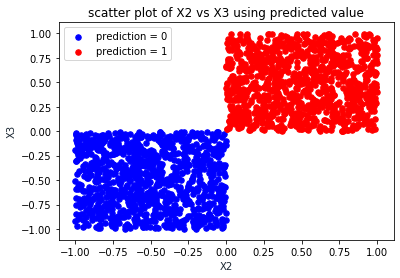

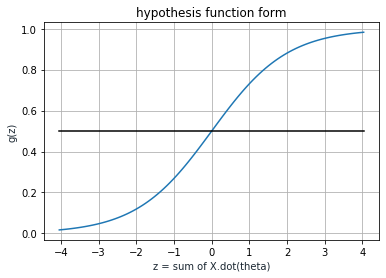

In [10]:
### plots of results
### predicted probabilities against X2
plt.scatter(X[pred == 0, 0], pred[pred == 0], s = 20, c = "blue", label = "predicted 0")
plt.scatter(X[pred == 1, 0], pred[pred == 1], s = 20, c = "r", label = "predicted 1")
plt.plot(np.linspace(-1,1,100), 0.5+0*np.linspace(0,1,100), c = "black", label = "threshold = 0.5")
plt.title('predicted value against X2')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('predicted value', color='#1C2833')
plt.legend(loc=2)
plt.show()

### predicted probabilities against X3
plt.scatter(X[pred == 0, 1], pred[pred == 0], s = 20, c = "blue", label = "predicted 0")
plt.scatter(X[pred == 1, 1], pred[pred == 1], s = 20, c = "r", label = "predicted 1")
plt.plot(np.linspace(-1,1,100), 0.5+0*np.linspace(0,1,100), c = "black", label = "threshold = 0.5")
plt.title('predicted value against X3')
plt.xlabel('X3', color='#1C2833')
plt.ylabel('predicted value', color='#1C2833')
plt.legend(loc=2)
plt.show()

### X2 vs H(W, theta) plot
plt.scatter(X[pred == 0, 0], h_final[pred == 0], s = 20, c = "blue", label = "pred 0 X2 vs H(W,theta)")
plt.scatter(X[pred == 1, 0], h_final[pred == 1], s = 20, c = "red", label = "pred 1 X2 vs H(W,theta)")
plt.plot(np.linspace(-1,1,100), 0.5+0*np.linspace(0,1,100), c = "black", label = "H(w, theta) = 0.5")
plt.title('predicted value against X2')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('predicted value', color='#1C2833')
plt.legend(loc=4)
plt.show()

### X3 vs H(W, theta) plot
plt.scatter(X[pred == 0, 1], h_final[pred == 0], s = 20, c = "blue", label = "pred 0 X3 vs H(W,theta)")
plt.scatter(X[pred == 1, 1], h_final[pred == 1], s = 20, c = "red", label = "pred 1 X3 vs H(W,theta)")
plt.plot(np.linspace(-1,1,100), 0.5+0*np.linspace(0,1,100), c = "black", label = "H(w, theta) = 0.5")
plt.title('predicted value against X3')
plt.xlabel('X3', color='#1C2833')
plt.ylabel('predicted value', color='#1C2833')
plt.legend(loc=4)
plt.show()

### prediction scatter plot X3 against X2
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 30, c = "blue", label = "prediction = 0")
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 30, c = "red", label = "prediction = 1")
plt.title('scatter plot of X2 vs X3 using predicted value')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('X3', color='#1C2833')
plt.legend(loc=2)
plt.show()

# the look of hypothesis function
ra = np.linspace(min(z), max(z), 100)
plt.plot(ra, 1 / (1+math.e**(-ra)) )
plt.plot(ra, 0.5+0*ra, c = "black", label = "H(w, theta) = 0.5")
plt.title('hypothesis function form')
plt.xlabel('z = sum of X.dot(theta)', color='#1C2833')
plt.ylabel('g(z)', color='#1C2833')
plt.grid()
plt.show()

These plots show that the data is separated into class 0 and 1 perfectly by threshold = 0.5. 

accuracy score is 100%.
confusion matrix:
 [[1000    0]
 [   0 1000]]


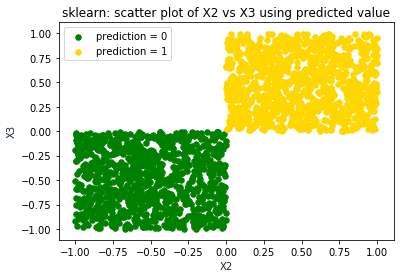

Plot shows the same result as prediction in section before sklearn.


In [11]:
# Repeat using sklearn library to obtain you hypothesis and plot it
##### sci-kit learn #####
## Train using your custom code and sklearn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(X)  # predicted classes

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y.flatten(), y_pred)
print("accuracy score is " + str(int(accuracy*100))+"%.")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("confusion matrix:\n", confusion_matrix(y, y_pred))  # no errors

# y_pred is the predicted results by using sklearn
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 30, c = "g", label = "prediction = 0")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 30, c = "gold", label = "prediction = 1")
plt.title('sklearn: scatter plot of X2 vs X3 using predicted value')
plt.xlabel('X2', color='#1C2833')
plt.ylabel('X3', color='#1C2833')
plt.legend(loc=2)
plt.show()

print("Plot shows the same result as prediction in section before sklearn.")

## PART B (Diabetes Dataset)

5 Points

In [12]:
df = pd.read_csv("data-03-diabetes.csv")
df.shape
df.head()
    
X = df.iloc[:, 0:(df.shape[1]-1)]
y = df.iloc[:, -1]

X = np.array(X)  
y = np.array(y)

# see range of all features
for i in range(X.shape[1]):
    print('X',i+1,'range:',min(X[i]),max(X[i]), end="\n")
# all X values are normalized

X 1 range: -0.882353 0.0819672
X 2 range: -0.633333 0.8391959999999999
X 3 range: -0.923997 0.0819672
X 4 range: -0.602837 0.8872760000000001
X 5 range: -0.894962 0.213115
X 6 range: -0.854825 -0.0760059
X 7 range: -0.9521780000000001 0.17647100000000002
X 8 range: -0.931682 0.979899


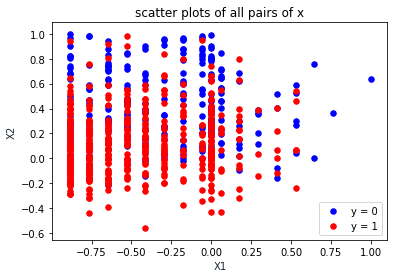

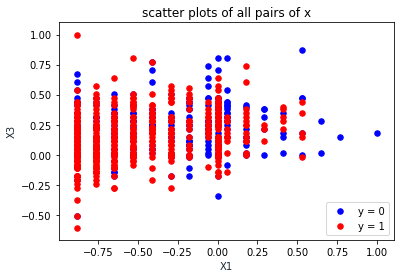

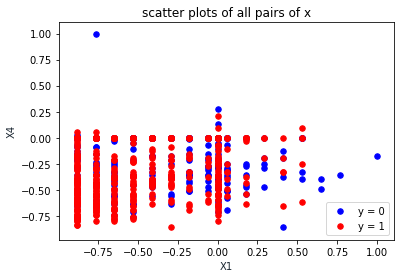

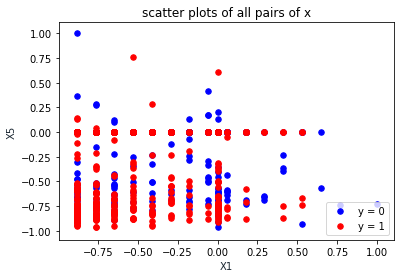

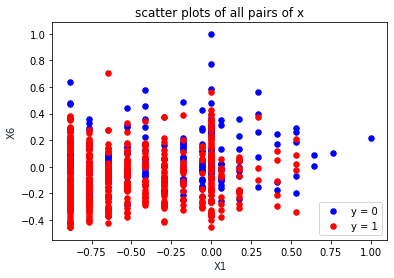

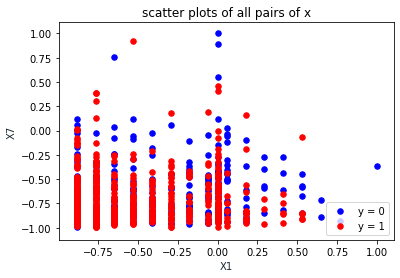

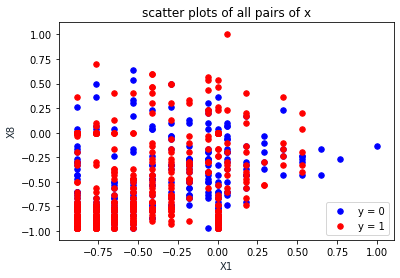

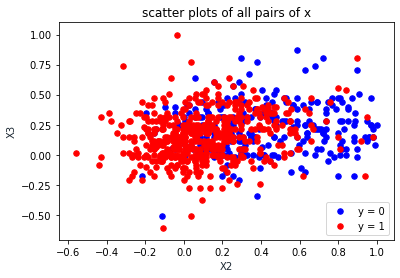

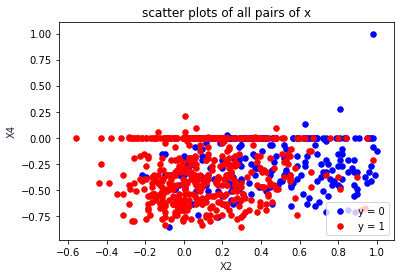

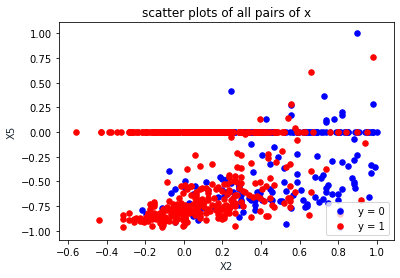

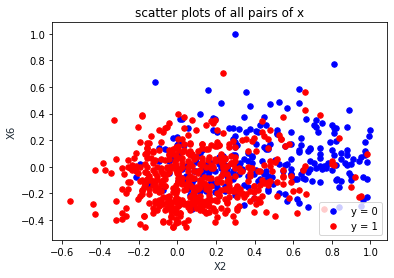

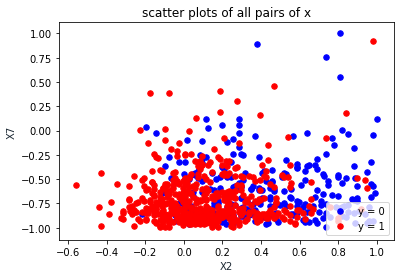

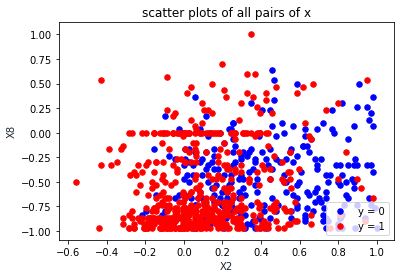

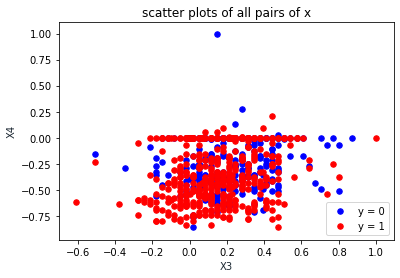

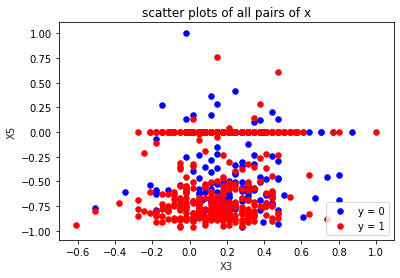

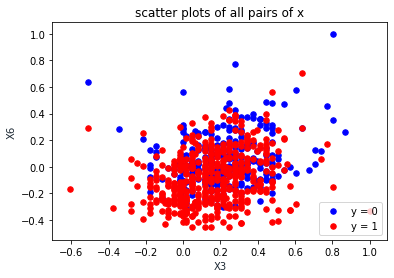

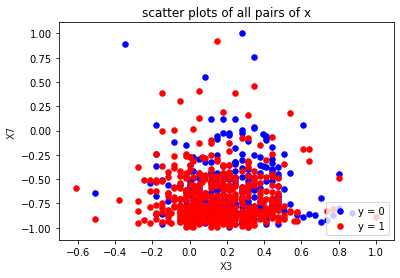

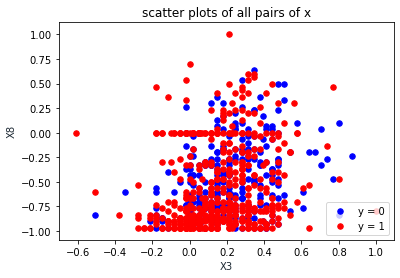

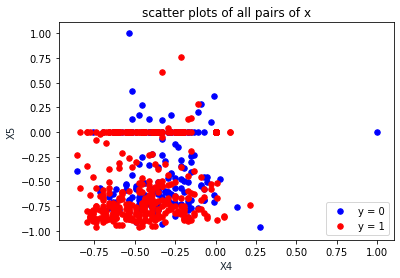

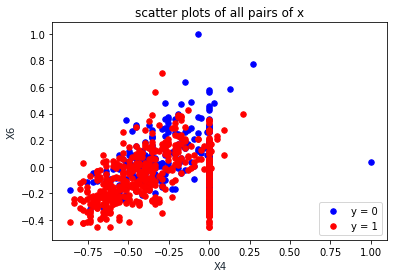

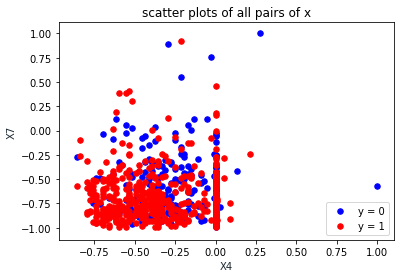

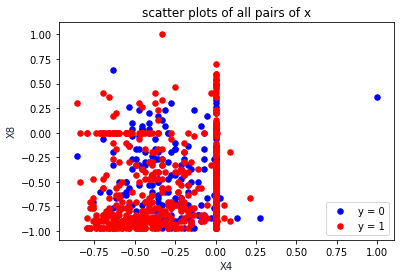

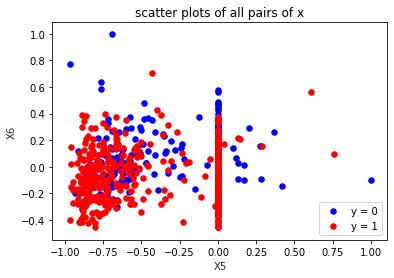

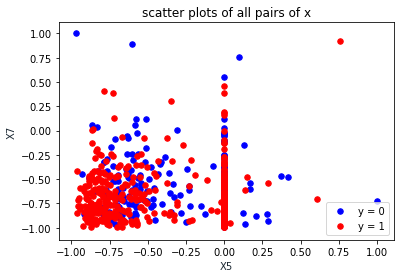

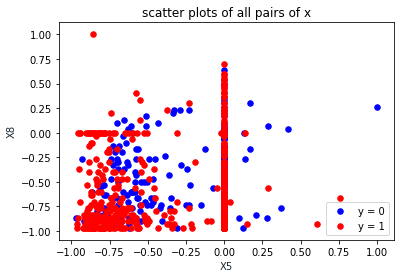

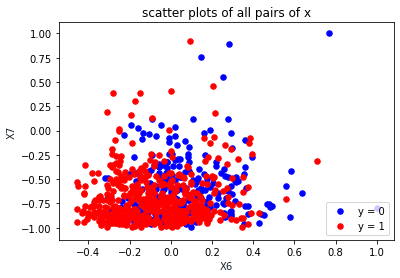

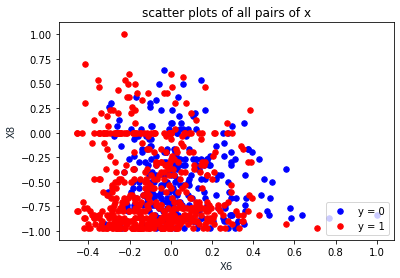

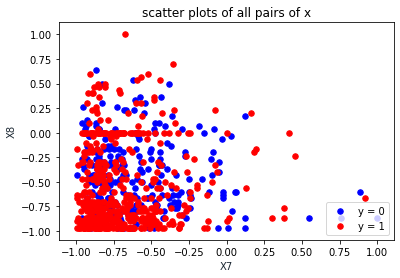

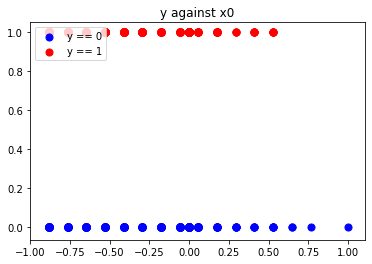

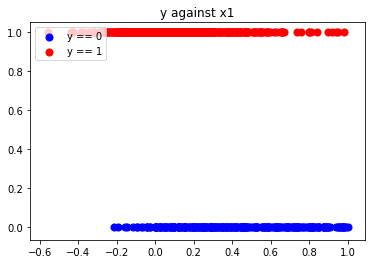

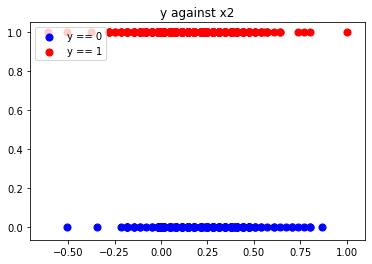

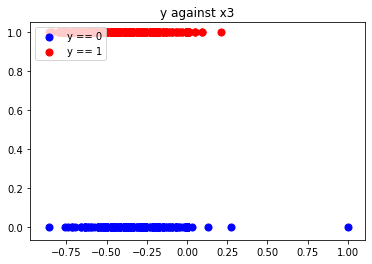

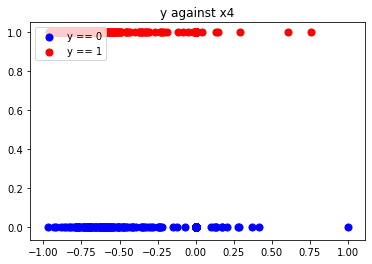

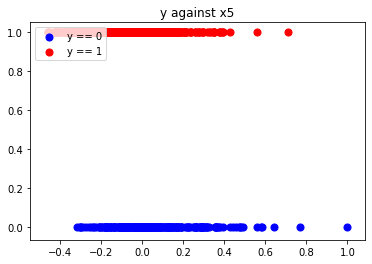

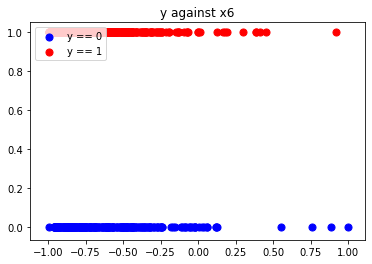

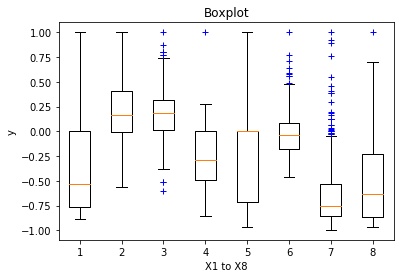

In [13]:
######## Plots #######

# Analyze the features (plot graphs and explain your findings)
#plt....

# pairwise plots of all x's
for i in range(X.shape[1]):
    for j in range(i, X.shape[1]):
        if i != j:
            plt.scatter(X[y == 0, i], X[y == 0, j], s = 30, c = "blue", label = "y = 0")
            plt.scatter(X[y == 1, i], X[y == 1, j], s = 30, c = "red", label = "y = 1")
            plt.title('scatter plots of all pairs of x')
            plt.xlabel('X'+str(i+1), color='#1C2833')
            plt.ylabel('X'+str(j+1), color='#1C2833')
            plt.legend(loc=4)
            plt.show()

# y against each x
for i in range(X.shape[1] - 1):
    plt.scatter(X[y==0, i], y[y==0], s = 50, c = 'blue', label = 'y == 0')
    plt.scatter(X[y==1, i], y[y==1], s = 50, c = 'red', label = 'y == 1')
    plt.title('y against x' + str(i))
    plt.legend(loc=2)
    plt.show()
    
# boxplot
plt.boxplot(X, sym = "b+", vert = True, meanline = True)
plt.title("Boxplot")
plt.xlabel("X1 to X8")
plt.ylabel("y")
plt.show()

The plots show that there are a lot of overlaps between X's for y=0 and y=1.
X1 appeared to be separated evenly from -1 to 1.
X2 and X5 plot show intresting pattern which implies a correlation between the two features.
X6 and X4 also show intresting pattern that implies positive correlation.
The rest of the pairs don't show strong patterns of correlation.
Many pairwise plots show that X4, X5 and X8 have a lot of 0 values.

Each individual y against x_i plot shows it is extremely difficult to use a single feature to predict y. Same values of x_(i)_j can result in either y = 0 or y = 1.

In [14]:
## split data into training and testing sets
# manually
rows = X.shape[0]
cols = X.shape[1]

ind = np.random.choice(range(rows), size=int(rows*.75), replace = False)  # randomly select 75% of the rows as training set
ind.sort()
X_train = X[ind]          # take 75% of rows randomly 
y_train = y[ind]          # take the same rows as X

ind_rest = []             # the rest of the indices not used for selecting training set
for i in range(rows):
    if i not in ind:
        ind_rest.append(i)
ind_rest.sort()
#len(ind_rest) + len(ind)

X_test = X[ind_rest]      # using the rest of un-selected rows as test set
y_test = y[ind_rest]

# train model using X_train, y_train
w = genWeight(cols, -1,1)  # generate random uniform weights
h = H(X_train,w)           # find values of the hypothesis function 
theta = gradDLogistic(X_train,y_train,w,h,0.01, 1000)   # grad descend to find optimal weight parameters, theta
"""
iteration: 0 , J(W): 0.7381902596608368, dJ(W): 0.04253518930211486
probability range: (array([0.35512605]), array([0.91745103])) 
w: 
[[-0.48780282]
 [ 0.83285135]
 [-0.24712471]
 [ 0.49631085]
 [-0.07003509]
 [ 0.93138384]
 [-0.9875609 ]
 [-0.65457461]]
#######################
iteration: 997 , J(W): 0.7370973407851452, dJ(W): 1.561815617922591e-05
probability range: (array([0.36355014]), array([0.9210921])) 
w: 
[[-0.53948003]
 [ 0.78117414]
 [-0.29880192]
 [ 0.44463364]
 [-0.1217123 ]
 [ 0.87970663]
 [-1.03923811]
 [-0.70625182]]
iteration: 998 , J(W): 0.7370973407827154, dJ(W): 1.5496083518196433e-05
probability range: (array([0.36355017]), array([0.92109211])) 
w: 
[[-0.53948018]
 [ 0.78117399]
 [-0.29880207]
 [ 0.44463348]
 [-0.12171246]
 [ 0.87970648]
 [-1.03923827]
 [-0.70625198]]
iteration: 999 , J(W): 0.7370973407803235, dJ(W): 1.5374965017968627e-05
probability range: (array([0.36355019]), array([0.92109212])) 
w: 
[[-0.53948034]
 [ 0.78117384]
 [-0.29880223]
 [ 0.44463333]
 [-0.12171261]
 [ 0.87970632]
 [-1.03923842]
 [-0.70625213]]

1000 iterations. All factors seem to converge.
"""

iteration: 0 , J(W): 0.8139053221036144, dJ(W): 0.7764157423394519
probability range: (array([0.24343035]), array([0.62518048])) 
w: 
[[ 0.29713842]
 [-0.06317086]
 [ 0.34734112]
 [ 0.52260726]
 [-0.08637756]
 [-0.71515356]
 [ 0.5901163 ]
 [-0.22002287]]
iteration: 1 , J(W): 0.8079121754280347, dJ(W): 0.7673731811830541
probability range: (array([0.24863123]), array([0.6228171])) 
w: 
[[ 0.28946469]
 [-0.0708446 ]
 [ 0.33966739]
 [ 0.51493353]
 [-0.09405129]
 [-0.72282729]
 [ 0.58244257]
 [-0.2276966 ]]
iteration: 2 , J(W): 0.8020580255703362, dJ(W): 0.7583814356659773
probability range: (array([0.24897375]), array([0.62047549])) 
w: 
[[ 0.28188087]
 [-0.07842841]
 [ 0.33208357]
 [ 0.50734972]
 [-0.10163511]
 [-0.7304111 ]
 [ 0.57485876]
 [-0.23528042]]
iteration: 3 , J(W): 0.7963404605153603, dJ(W): 0.749443853690733
probability range: (array([0.24911203]), array([0.61815579])) 
w: 
[[ 0.27438644]
 [-0.08592285]
 [ 0.32458914]
 [ 0.49985528]
 [-0.10912955]
 [-0.73790554]
 [ 0.56736432

iteration: 36 , J(W): 0.6685930357007966, dJ(W): 0.4977810330547202
probability range: (array([0.25286079]), array([0.65797319])) 
w: 
[[ 0.07237136]
 [-0.28793792]
 [ 0.12257406]
 [ 0.29784021]
 [-0.31114462]
 [-0.93992061]
 [ 0.36534924]
 [-0.44478993]]
iteration: 37 , J(W): 0.6661305086784608, dJ(W): 0.4916221052716064
probability range: (array([0.25295249]), array([0.66195066])) 
w: 
[[ 0.06745514]
 [-0.29285414]
 [ 0.11765784]
 [ 0.29292398]
 [-0.31606084]
 [-0.94483684]
 [ 0.36043302]
 [-0.44970615]]
iteration: 38 , J(W): 0.6637285199085491, dJ(W): 0.4855481449474514
probability range: (array([0.25304307]), array([0.66585658])) 
w: 
[[ 0.06259966]
 [-0.29770962]
 [ 0.11280236]
 [ 0.2880685 ]
 [-0.32091632]
 [-0.94969232]
 [ 0.35557754]
 [-0.45456163]]
iteration: 39 , J(W): 0.6613854951854049, dJ(W): 0.4795584395940572
probability range: (array([0.25313256]), array([0.66969204])) 
w: 
[[ 0.05780408]
 [-0.30250521]
 [ 0.10800678]
 [ 0.28327292]
 [-0.32571191]
 [-0.9544879 ]
 [ 0.35

iteration: 74 , J(W): 0.6067954417469601, dJ(W): 0.31605019147980135
probability range: (array([0.25567806]), array([0.78633303])) 
w: 
[[-0.07820363]
 [-0.43851291]
 [-0.02800093]
 [ 0.14726522]
 [-0.46171961]
 [-1.0904956 ]
 [ 0.21477425]
 [-0.59536492]]
iteration: 75 , J(W): 0.6058021975773896, dJ(W): 0.31248725671196126
probability range: (array([0.2557367]), array([0.78896973])) 
w: 
[[-0.0813285 ]
 [-0.44163778]
 [-0.0311258 ]
 [ 0.14414034]
 [-0.46484448]
 [-1.09362048]
 [ 0.21164938]
 [-0.59848979]]
iteration: 76 , J(W): 0.604831205465535, dJ(W): 0.30897474492666993
probability range: (array([0.2557947]), array([0.7915532])) 
w: 
[[-0.08441825]
 [-0.44472753]
 [-0.03421555]
 [ 0.1410506 ]
 [-0.46793423]
 [-1.09671022]
 [ 0.20855963]
 [-0.60157954]]
iteration: 77 , J(W): 0.6038819038949915, dJ(W): 0.30551183628353556
probability range: (array([0.25585205]), array([0.79408464])) 
w: 
[[-0.08747337]
 [-0.44778265]
 [-0.03727067]
 [ 0.13799548]
 [-0.47098935]
 [-1.09976534]
 [ 0.20

iteration: 110 , J(W): 0.5818164399244468, dJ(W): 0.21437368827212455
probability range: (array([0.25743525]), array([0.85499023])) 
w: 
[[-0.17167924]
 [-0.53198852]
 [-0.12147654]
 [ 0.0537896 ]
 [-0.55519522]
 [-1.18397121]
 [ 0.12129864]
 [-0.68884053]]
iteration: 111 , J(W): 0.5813592201730123, dJ(W): 0.21219058097062002
probability range: (array([0.25747521]), array([0.85631094])) 
w: 
[[-0.17380114]
 [-0.53411043]
 [-0.12359844]
 [ 0.0516677 ]
 [-0.55731713]
 [-1.18609312]
 [ 0.11917674]
 [-0.69096243]]
iteration: 112 , J(W): 0.580911259318434, dJ(W): 0.2100353733937129
probability range: (array([0.25751476]), array([0.85760832])) 
w: 
[[-0.1759015 ]
 [-0.53621078]
 [-0.1256988 ]
 [ 0.04956735]
 [-0.55941748]
 [-1.18819347]
 [ 0.11707638]
 [-0.69306279]]
iteration: 113 , J(W): 0.5804723462234799, dJ(W): 0.20790762172974486
probability range: (array([0.25755392]), array([0.85888289])) 
w: 
[[-0.17798057]
 [-0.53828986]
 [-0.12777787]
 [ 0.04748827]
 [-0.56149656]
 [-1.19027255]
 

iteration: 148 , J(W): 0.5695038183267722, dJ(W): 0.1478143061721084
probability range: (array([0.25631265]), array([0.89229091])) 
w: 
[[-0.23919124]
 [-0.59950052]
 [-0.18898854]
 [-0.0137224 ]
 [-0.62270722]
 [-1.25148322]
 [ 0.05378664]
 [-0.75635253]]
iteration: 149 , J(W): 0.5692863453060981, dJ(W): 0.14643782374059647
probability range: (array([0.25607252]), array([0.89299746])) 
w: 
[[-0.24065562]
 [-0.6009649 ]
 [-0.19045292]
 [-0.01518678]
 [-0.6241716 ]
 [-1.2529476 ]
 [ 0.05232226]
 [-0.75781691]]
iteration: 150 , J(W): 0.5690729016856161, dJ(W): 0.1450769732601796
probability range: (array([0.25583476]), array([0.89369341])) 
w: 
[[-0.24210639]
 [-0.60241567]
 [-0.19190369]
 [-0.01663755]
 [-0.62562237]
 [-1.25439836]
 [ 0.05087149]
 [-0.75926768]]
iteration: 151 , J(W): 0.5688634046992765, dJ(W): 0.1437315317844084
probability range: (array([0.25559936]), array([0.89437895])) 
w: 
[[-0.2435437 ]
 [-0.60385299]
 [-0.193341  ]
 [-0.01807486]
 [-0.62705969]
 [-1.25583568]
 [

iteration: 184 , J(W): 0.5637184716918953, dJ(W): 0.10671925242864022
probability range: (array([0.24898238]), array([0.91225686])) 
w: 
[[-0.28431962]
 [-0.64462891]
 [-0.23411692]
 [-0.05885078]
 [-0.6678356 ]
 [-1.2966116 ]
 [ 0.00865826]
 [-0.80148091]]
iteration: 185 , J(W): 0.5636050783544921, dJ(W): 0.10578873857619193
probability range: (array([0.24881229]), array([0.91268202])) 
w: 
[[-0.28537751]
 [-0.64568679]
 [-0.23517481]
 [-0.05990867]
 [-0.66889349]
 [-1.29766949]
 [ 0.00760037]
 [-0.8025388 ]]
iteration: 186 , J(W): 0.5634936530327427, dJ(W): 0.10486780589762221
probability range: (array([0.24864376]), array([0.91310162])) 
w: 
[[-0.28642619]
 [-0.64673547]
 [-0.23622349]
 [-0.06095734]
 [-0.66994217]
 [-1.29871816]
 [ 0.00655169]
 [-0.80358748]]
iteration: 187 , J(W): 0.5633841585122401, dJ(W): 0.10395633229195646
probability range: (array([0.24847678]), array([0.91351578])) 
w: 
[[-0.28746575]
 [-0.64777503]
 [-0.23726305]
 [-0.06199691]
 [-0.67098173]
 [-1.29975773]

iteration: 222 , J(W): 0.5605286107068503, dJ(W): 0.0771910290918476
probability range: (array([0.24348571]), array([0.92517177])) 
w: 
[[-0.31876303]
 [-0.67907231]
 [-0.26856033]
 [-0.09329419]
 [-0.70227901]
 [-1.331055  ]
 [-0.02578515]
 [-0.83592432]]
iteration: 223 , J(W): 0.5604692725849441, dJ(W): 0.07655266901289769
probability range: (array([0.24336451]), array([0.92543789])) 
w: 
[[-0.31952855]
 [-0.67983784]
 [-0.26932585]
 [-0.09405971]
 [-0.70304454]
 [-1.33182053]
 [-0.02655067]
 [-0.83668984]]
iteration: 224 , J(W): 0.5604109115514078, dJ(W): 0.07592034730759403
probability range: (array([0.24324435]), array([0.92570094])) 
w: 
[[-0.32028776]
 [-0.68059704]
 [-0.27008506]
 [-0.09481892]
 [-0.70380374]
 [-1.33257973]
 [-0.02730988]
 [-0.83744905]]
iteration: 225 , J(W): 0.5603535103715006, dJ(W): 0.07529399499704716
probability range: (array([0.24312523]), array([0.92596098])) 
w: 
[[-0.3210407 ]
 [-0.68134998]
 [-0.270838  ]
 [-0.09557186]
 [-0.70455668]
 [-1.33333267]


iteration: 258 , J(W): 0.5589020991297418, dJ(W): 0.0575733040708094
probability range: (array([0.23971157]), array([0.9330991])) 
w: 
[[-0.34272783]
 [-0.70303711]
 [-0.29252513]
 [-0.11725898]
 [-0.72624381]
 [-1.3550198 ]
 [-0.04974994]
 [-0.85988912]]
iteration: 259 , J(W): 0.5588690842436597, dJ(W): 0.05711494201737321
probability range: (array([0.23962213]), array([0.93327814])) 
w: 
[[-0.34329898]
 [-0.70360826]
 [-0.29309628]
 [-0.11783013]
 [-0.72681496]
 [-1.35559095]
 [-0.05032109]
 [-0.86046026]]
iteration: 260 , J(W): 0.5588365928328525, dJ(W): 0.0566606460076563
probability range: (array([0.23953342]), array([0.93345533])) 
w: 
[[-0.34386558]
 [-0.70417487]
 [-0.29366288]
 [-0.11839674]
 [-0.72738156]
 [-1.35615756]
 [-0.0508877 ]
 [-0.86102687]]
iteration: 261 , J(W): 0.5588046161277038, dJ(W): 0.05621037359618002
probability range: (array([0.23944544]), array([0.93363067])) 
w: 
[[-0.34442769]
 [-0.70473697]
 [-0.29422499]
 [-0.11895884]
 [-0.72794367]
 [-1.35671966]
 [

iteration: 294 , J(W): 0.55798898282965, dJ(W): 0.04335975123251788
probability range: (array([0.23690966]), array([0.93852109])) 
w: 
[[-0.3606916 ]
 [-0.72100088]
 [-0.3104889 ]
 [-0.13522275]
 [-0.74420758]
 [-1.37298357]
 [-0.06771372]
 [-0.87785289]]
iteration: 295 , J(W): 0.5579702548525352, dJ(W): 0.04302444204441235
probability range: (array([0.23684284]), array([0.93864576])) 
w: 
[[-0.36112184]
 [-0.72143113]
 [-0.31091914]
 [-0.135653  ]
 [-0.74463782]
 [-1.37341382]
 [-0.06814396]
 [-0.87828313]]
iteration: 296 , J(W): 0.5579518153591395, dJ(W): 0.04269195941426676
probability range: (array([0.23677655]), array([0.93876923])) 
w: 
[[-0.36154876]
 [-0.72185805]
 [-0.31134606]
 [-0.13607992]
 [-0.74506474]
 [-1.37384074]
 [-0.06857088]
 [-0.87871005]]
iteration: 297 , J(W): 0.5579336597074521, dJ(W): 0.04236227600744364
probability range: (array([0.23671078]), array([0.93889152])) 
w: 
[[-0.36197238]
 [-0.72228167]
 [-0.31176968]
 [-0.13650354]
 [-0.74548837]
 [-1.37426436]
 

iteration: 330 , J(W): 0.5574675443406126, dJ(W): 0.03289129702607956
probability range: (array([0.2348071]), array([0.94234346])) 
w: 
[[-0.3742708 ]
 [-0.73458009]
 [-0.3240681 ]
 [-0.14880196]
 [-0.75778678]
 [-1.38656278]
 [-0.08129292]
 [-0.89143209]]
iteration: 331 , J(W): 0.5574567668784678, dJ(W): 0.032642548132425155
probability range: (array([0.23475672]), array([0.94243254])) 
w: 
[[-0.37459723]
 [-0.73490651]
 [-0.32439453]
 [-0.14912839]
 [-0.75811321]
 [-1.3868892 ]
 [-0.08161935]
 [-0.89175852]]
iteration: 332 , J(W): 0.5574461517928307, dJ(W): 0.032395813439462844
probability range: (array([0.23470673]), array([0.94252081])) 
w: 
[[-0.37492119]
 [-0.73523047]
 [-0.32471849]
 [-0.14945234]
 [-0.75843717]
 [-1.38721316]
 [-0.0819433 ]
 [-0.89208248]]
iteration: 333 , J(W): 0.5574356965516242, dJ(W): 0.032151074670428326
probability range: (array([0.23465712]), array([0.94260829])) 
w: 
[[-0.3752427 ]
 [-0.73555198]
 [-0.32504   ]
 [-0.14977385]
 [-0.75875868]
 [-1.3875346

iteration: 366 , J(W): 0.5571659648756968, dJ(W): 0.0250853897946684
probability range: (array([0.23321665]), array([0.94510006])) 
w: 
[[-0.38460023]
 [-0.74490951]
 [-0.33439753]
 [-0.15913139]
 [-0.76811621]
 [-1.39689221]
 [-0.09162235]
 [-0.90176152]]
iteration: 367 , J(W): 0.5571596955010096, dJ(W): 0.024898894754352325
probability range: (array([0.2331784]), array([0.94516495])) 
w: 
[[-0.38484922]
 [-0.7451585 ]
 [-0.33464652]
 [-0.15938038]
 [-0.7683652 ]
 [-1.3971412 ]
 [-0.09187134]
 [-0.90201051]]
iteration: 368 , J(W): 0.557153518988443, dJ(W): 0.024713862866675443
probability range: (array([0.23314045]), array([0.94522928])) 
w: 
[[-0.38509636]
 [-0.74540564]
 [-0.33489366]
 [-0.15962751]
 [-0.76861234]
 [-1.39738833]
 [-0.09211848]
 [-0.90225765]]
iteration: 369 , J(W): 0.5571474339248331, dJ(W): 0.024530281531898283
probability range: (array([0.23310278]), array([0.94529307])) 
w: 
[[-0.38534166]
 [-0.74565094]
 [-0.33513896]
 [-0.15987282]
 [-0.76885764]
 [-1.39763364]

iteration: 402 , J(W): 0.5569898679173743, dJ(W): 0.019210227630211695
probability range: (array([0.2320063]), array([0.94712246])) 
w: 
[[-0.39249479]
 [-0.75280407]
 [-0.34229209]
 [-0.16702595]
 [-0.77601077]
 [-1.40478677]
 [-0.09951691]
 [-0.90965608]]
iteration: 403 , J(W): 0.5569861911278237, dJ(W): 0.019069279967571746
probability range: (array([0.23197712]), array([0.94717043])) 
w: 
[[-0.39268548]
 [-0.75299477]
 [-0.34248278]
 [-0.16721664]
 [-0.77620146]
 [-1.40497746]
 [-0.0997076 ]
 [-0.90984677]]
iteration: 404 , J(W): 0.5569825680901389, dJ(W): 0.018929411100343387
probability range: (array([0.23194815]), array([0.947218])) 
w: 
[[-0.39287478]
 [-0.75318406]
 [-0.34267208]
 [-0.16740593]
 [-0.77639076]
 [-1.40516675]
 [-0.0998969 ]
 [-0.91003607]]
iteration: 405 , J(W): 0.5569789980016988, dJ(W): 0.018790612125356616
probability range: (array([0.23191941]), array([0.94726519])) 
w: 
[[-0.39306268]
 [-0.75337197]
 [-0.34285998]
 [-0.16759384]
 [-0.77657867]
 [-1.40535466

iteration: 439 , J(W): 0.5568841256127269, dJ(W): 0.014649564689725439
probability range: (array([0.23105864]), array([0.94866152])) 
w: 
[[-0.39869654]
 [-0.75900582]
 [-0.34849384]
 [-0.1732277 ]
 [-0.78221252]
 [-1.41098852]
 [-0.10571866]
 [-0.91585783]]
iteration: 440 , J(W): 0.5568819873072017, dJ(W): 0.014543191394778478
probability range: (array([0.23103646]), array([0.94869709])) 
w: 
[[-0.39884197]
 [-0.75915126]
 [-0.34863927]
 [-0.17337313]
 [-0.78235795]
 [-1.41113395]
 [-0.10586409]
 [-0.91600326]]
iteration: 441 , J(W): 0.5568798799403473, dJ(W): 0.014437616310404537
probability range: (array([0.23101443]), array([0.94873239])) 
w: 
[[-0.39898635]
 [-0.75929563]
 [-0.34878365]
 [-0.1735175 ]
 [-0.78250233]
 [-1.41127832]
 [-0.10600847]
 [-0.91614764]]
iteration: 442 , J(W): 0.5568778030571053, dJ(W): 0.01433283307621748
probability range: (array([0.23099256]), array([0.9487674])) 
w: 
[[-0.39912968]
 [-0.75943896]
 [-0.34892698]
 [-0.17366083]
 [-0.78264566]
 [-1.4114216

iteration: 475 , J(W): 0.5568237554613036, dJ(W): 0.011280682100841018
probability range: (array([0.23035397]), array([0.94978115])) 
w: 
[[-0.40331999]
 [-0.76362927]
 [-0.35311729]
 [-0.17785115]
 [-0.78683597]
 [-1.41561197]
 [-0.11034211]
 [-0.92048128]]
iteration: 476 , J(W): 0.556822487507807, dJ(W): 0.011199406053422926
probability range: (array([0.23033692]), array([0.94980798])) 
w: 
[[-0.40343198]
 [-0.76374127]
 [-0.35322928]
 [-0.17796314]
 [-0.78694796]
 [-1.41572396]
 [-0.1104541 ]
 [-0.92059327]]
iteration: 477 , J(W): 0.556821237758563, dJ(W): 0.011118730829194323
probability range: (array([0.23032]), array([0.94983461])) 
w: 
[[-0.40354317]
 [-0.76385245]
 [-0.35334047]
 [-0.17807433]
 [-0.78705915]
 [-1.41583515]
 [-0.11056529]
 [-0.92070446]]
iteration: 478 , J(W): 0.5568200059488367, dJ(W): 0.011038651769091905
probability range: (array([0.23030319]), array([0.94986103])) 
w: 
[[-0.40365356]
 [-0.76396284]
 [-0.35345086]
 [-0.17818471]
 [-0.78716954]
 [-1.41594553]


iteration: 512 , J(W): 0.5567871433001134, dJ(W): 0.008639852607405239
probability range: (array([0.22979877]), array([0.95064861])) 
w: 
[[-0.4069699 ]
 [-0.76727919]
 [-0.3567672 ]
 [-0.18150106]
 [-0.79048589]
 [-1.41926188]
 [-0.11399202]
 [-0.92413119]]
iteration: 513 , J(W): 0.5567863995022443, dJ(W): 0.008577985880701596
probability range: (array([0.22978574]), array([0.95066883])) 
w: 
[[-0.40705568]
 [-0.76736497]
 [-0.35685298]
 [-0.18158684]
 [-0.79057167]
 [-1.41934766]
 [-0.1140778 ]
 [-0.92421697]]
iteration: 514 , J(W): 0.5567856663179672, dJ(W): 0.008516571065127413
probability range: (array([0.22977279]), array([0.95068889])) 
w: 
[[-0.40714085]
 [-0.76745013]
 [-0.35693815]
 [-0.18167201]
 [-0.79065683]
 [-1.41943283]
 [-0.11416297]
 [-0.92430214]]
iteration: 515 , J(W): 0.5567849435943225, dJ(W): 0.0084556047331007
probability range: (array([0.22975994]), array([0.9507088])) 
w: 
[[-0.40722541]
 [-0.76753469]
 [-0.35702271]
 [-0.18175656]
 [-0.79074139]
 [-1.41951738

iteration: 551 , J(W): 0.5567647682478422, dJ(W): 0.006532741435304519
probability range: (array([0.22935398]), array([0.95133434])) 
w: 
[[-0.40989858]
 [-0.77020786]
 [-0.35969588]
 [-0.18442973]
 [-0.79341456]
 [-1.42219055]
 [-0.11692069]
 [-0.92705986]]
iteration: 552 , J(W): 0.5567643430011694, dJ(W): 0.00648619418953769
probability range: (array([0.22934414]), array([0.95134943])) 
w: 
[[-0.40996344]
 [-0.77027272]
 [-0.35976074]
 [-0.18449459]
 [-0.79347942]
 [-1.42225541]
 [-0.11698556]
 [-0.92712473]]
iteration: 553 , J(W): 0.5567639237926978, dJ(W): 0.00643998368059415
probability range: (array([0.22933436]), array([0.9513644])) 
w: 
[[-0.41002784]
 [-0.77033712]
 [-0.35982514]
 [-0.18455899]
 [-0.79354382]
 [-1.42231981]
 [-0.11704996]
 [-0.92718913]]
iteration: 554 , J(W): 0.5567635105360391, dJ(W): 0.006394107400553531
probability range: (array([0.22932466]), array([0.95137926])) 
w: 
[[-0.41009178]
 [-0.77040106]
 [-0.35988908]
 [-0.18462294]
 [-0.79360776]
 [-1.42238376

iteration: 588 , J(W): 0.5567524594549226, dJ(W): 0.005016504235690973
probability range: (array([0.22903292]), array([0.95182426])) 
w: 
[[-0.41201511]
 [-0.7723244 ]
 [-0.36181241]
 [-0.18654627]
 [-0.7955311 ]
 [-1.42430709]
 [-0.11903723]
 [-0.9291764 ]]
iteration: 589 , J(W): 0.5567522086951194, dJ(W): 0.004980888521182487
probability range: (array([0.22902537]), array([0.95183573])) 
w: 
[[-0.41206492]
 [-0.77237421]
 [-0.36186222]
 [-0.18659608]
 [-0.7955809 ]
 [-1.4243569 ]
 [-0.11908704]
 [-0.92922621]]
iteration: 590 , J(W): 0.5567519614832449, dJ(W): 0.004945528655371649
probability range: (array([0.22901787]), array([0.95184712])) 
w: 
[[-0.41211438]
 [-0.77242366]
 [-0.36191168]
 [-0.18664553]
 [-0.79563036]
 [-1.42440635]
 [-0.1191365 ]
 [-0.92927567]]
iteration: 591 , J(W): 0.5567517177688063, dJ(W): 0.004910422758178967
probability range: (array([0.22901042]), array([0.95185843])) 
w: 
[[-0.41216348]
 [-0.77247277]
 [-0.36196078]
 [-0.18669464]
 [-0.79567946]
 [-1.42445

iteration: 624 , J(W): 0.5567453457873986, dJ(W): 0.0038829055114030396
probability range: (array([0.22879233]), array([0.95218862])) 
w: 
[[-0.41360255]
 [-0.77391184]
 [-0.36339985]
 [-0.18813371]
 [-0.79711853]
 [-1.42589453]
 [-0.12062467]
 [-0.93076384]]
iteration: 625 , J(W): 0.5567451955516217, dJ(W): 0.0038554121823213727
probability range: (array([0.22878649]), array([0.95219744])) 
w: 
[[-0.41364111]
 [-0.77395039]
 [-0.36343841]
 [-0.18817226]
 [-0.79715709]
 [-1.42593308]
 [-0.12066322]
 [-0.9308024 ]]
iteration: 626 , J(W): 0.5567450474357994, dJ(W): 0.0038281153096878964
probability range: (array([0.22878069]), array([0.95220619])) 
w: 
[[-0.41367939]
 [-0.77398867]
 [-0.36347669]
 [-0.18821054]
 [-0.79719537]
 [-1.42597136]
 [-0.12070151]
 [-0.93084068]]
iteration: 627 , J(W): 0.5567449014098821, dJ(W): 0.003801013464533787
probability range: (array([0.22877493]), array([0.95221488])) 
w: 
[[-0.4137174 ]
 [-0.77402668]
 [-0.3635147 ]
 [-0.18824855]
 [-0.79723338]
 [-1.42

iteration: 658 , J(W): 0.5567412655261189, dJ(W): 0.0030502689937019377
probability range: (array([0.22861531]), array([0.9524552])) 
w: 
[[-0.4147713 ]
 [-0.77508058]
 [-0.3645686 ]
 [-0.18930246]
 [-0.79828728]
 [-1.42706327]
 [-0.12179342]
 [-0.93193259]]
iteration: 659 , J(W): 0.5567411728134539, dJ(W): 0.0030287140697869155
probability range: (array([0.22861073]), array([0.95246209])) 
w: 
[[-0.41480159]
 [-0.77511087]
 [-0.36459889]
 [-0.18933274]
 [-0.79831757]
 [-1.42709356]
 [-0.1218237 ]
 [-0.93196287]]
iteration: 660 , J(W): 0.5567410814064631, dJ(W): 0.0030073125665831353
probability range: (array([0.22860617]), array([0.95246893])) 
w: 
[[-0.41483166]
 [-0.77514094]
 [-0.36462896]
 [-0.18936282]
 [-0.79834764]
 [-1.42712364]
 [-0.12185378]
 [-0.93199295]]
iteration: 661 , J(W): 0.5567409912866919, dJ(W): 0.0029860633766044874
probability range: (array([0.22860165]), array([0.95247572])) 
w: 
[[-0.41486152]
 [-0.7751708 ]
 [-0.36465882]
 [-0.18939268]
 [-0.7983775 ]
 [-1.42

iteration: 694 , J(W): 0.5567386328141328, dJ(W): 0.002363499974237586
probability range: (array([0.22846911]), array([0.95267442])) 
w: 
[[-0.41573706]
 [-0.77604635]
 [-0.36553436]
 [-0.19026822]
 [-0.79925304]
 [-1.42802904]
 [-0.12275918]
 [-0.93289835]]
iteration: 695 , J(W): 0.5567385771498633, dJ(W): 0.002346825542281802
probability range: (array([0.22846556]), array([0.95267973])) 
w: 
[[-0.41576053]
 [-0.77606982]
 [-0.36555783]
 [-0.19029169]
 [-0.79927651]
 [-1.42805251]
 [-0.12278265]
 [-0.93292182]]
iteration: 696 , J(W): 0.5567385222682354, dJ(W): 0.0023302694086558993
probability range: (array([0.22846203]), array([0.95268501])) 
w: 
[[-0.41578383]
 [-0.77609312]
 [-0.36558113]
 [-0.19031499]
 [-0.79929982]
 [-1.42807581]
 [-0.12280595]
 [-0.93294512]]
iteration: 697 , J(W): 0.5567384681582136, dJ(W): 0.0023138307248028764
probability range: (array([0.22845853]), array([0.95269025])) 
w: 
[[-0.41580697]
 [-0.77611626]
 [-0.36560427]
 [-0.19033813]
 [-0.79932295]
 [-1.428

iteration: 731 , J(W): 0.5567370181541977, dJ(W): 0.0018191302062966243
probability range: (array([0.2283531]), array([0.95284775])) 
w: 
[[-0.41650372]
 [-0.776813  ]
 [-0.36630102]
 [-0.19103488]
 [-0.8000197 ]
 [-1.4287957 ]
 [-0.12352584]
 [-0.93366501]]
iteration: 732 , J(W): 0.556736985178432, dJ(W): 0.0018063130114247942
probability range: (array([0.22835037]), array([0.95285183])) 
w: 
[[-0.41652178]
 [-0.77683107]
 [-0.36631908]
 [-0.19105294]
 [-0.80003777]
 [-1.42881376]
 [-0.1235439 ]
 [-0.93368307]]
iteration: 733 , J(W): 0.5567369526657058, dJ(W): 0.0017935865147663797
probability range: (array([0.22834766]), array([0.95285588])) 
w: 
[[-0.41653972]
 [-0.776849  ]
 [-0.36633702]
 [-0.19107088]
 [-0.8000557 ]
 [-1.4288317 ]
 [-0.12356184]
 [-0.93370101]]
iteration: 734 , J(W): 0.5567369206095033, dJ(W): 0.0017809500690281468
probability range: (array([0.22834496]), array([0.9528599])) 
w: 
[[-0.41655753]
 [-0.77686681]
 [-0.36635483]
 [-0.19108869]
 [-0.80007351]
 [-1.4288

iteration: 767 , J(W): 0.5567360811788643, dJ(W): 0.0014104933097663329
probability range: (array([0.22826595]), array([0.95297762])) 
w: 
[[-0.41707988]
 [-0.77738917]
 [-0.36687718]
 [-0.19161104]
 [-0.80059587]
 [-1.42937186]
 [-0.124102  ]
 [-0.93424117]]
iteration: 768 , J(W): 0.5567360613539698, dJ(W): 0.001400565018647201
probability range: (array([0.22826383]), array([0.95298077])) 
w: 
[[-0.41709389]
 [-0.77740317]
 [-0.36689119]
 [-0.19162505]
 [-0.80060987]
 [-1.42938587]
 [-0.12411601]
 [-0.93425518]]
iteration: 769 , J(W): 0.556736041807181, dJ(W): 0.0013907068465212086
probability range: (array([0.22826172]), array([0.9529839])) 
w: 
[[-0.4171078 ]
 [-0.77741708]
 [-0.3669051 ]
 [-0.19163895]
 [-0.80062378]
 [-1.42939977]
 [-0.12412991]
 [-0.93426909]]
iteration: 770 , J(W): 0.5567360225345912, dJ(W): 0.0013809182948759408
probability range: (array([0.22825964]), array([0.95298701])) 
w: 
[[-0.41712161]
 [-0.77743089]
 [-0.36691891]
 [-0.19165276]
 [-0.80063759]
 [-1.4294

iteration: 803 , J(W): 0.5567355177572094, dJ(W): 0.001093892299676441
probability range: (array([0.22819838]), array([0.95307809])) 
w: 
[[-0.41752667]
 [-0.77783596]
 [-0.36732397]
 [-0.19205783]
 [-0.80104265]
 [-1.42981865]
 [-0.12454879]
 [-0.93468796]]
iteration: 804 , J(W): 0.5567355058332866, dJ(W): 0.001086198377367426
probability range: (array([0.22819673]), array([0.95308053])) 
w: 
[[-0.41753753]
 [-0.77784682]
 [-0.36733483]
 [-0.19206869]
 [-0.80105352]
 [-1.42982951]
 [-0.12455965]
 [-0.93469882]]
iteration: 805 , J(W): 0.5567354940765087, dJ(W): 0.0010785587117296584
probability range: (array([0.2281951]), array([0.95308295])) 
w: 
[[-0.41754832]
 [-0.7778576 ]
 [-0.36734562]
 [-0.19207948]
 [-0.8010643 ]
 [-1.4298403 ]
 [-0.12457044]
 [-0.93470961]]
iteration: 806 , J(W): 0.5567354824845278, dJ(W): 0.0010709729181721099
probability range: (array([0.22819348]), array([0.95308536])) 
w: 
[[-0.41755903]
 [-0.77786831]
 [-0.36735633]
 [-0.19209019]
 [-0.80107501]
 [-1.4298

iteration: 840 , J(W): 0.5567351716521455, dJ(W): 0.0008425373006177792
probability range: (array([0.22814471]), array([0.95315777])) 
w: 
[[-0.41788163]
 [-0.77819092]
 [-0.36767893]
 [-0.19241279]
 [-0.80139761]
 [-1.43017361]
 [-0.12490375]
 [-0.93504292]]
iteration: 841 , J(W): 0.5567351645784032, dJ(W): 0.0008366148706090842
probability range: (array([0.22814344]), array([0.95315964])) 
w: 
[[-0.41789   ]
 [-0.77819928]
 [-0.3676873 ]
 [-0.19242115]
 [-0.80140598]
 [-1.43018197]
 [-0.12491212]
 [-0.93505129]]
iteration: 842 , J(W): 0.5567351576037594, dJ(W): 0.0008307341547800965
probability range: (array([0.22814219]), array([0.9531615])) 
w: 
[[-0.4178983 ]
 [-0.77820759]
 [-0.3676956 ]
 [-0.19242946]
 [-0.80141429]
 [-1.43019028]
 [-0.12492042]
 [-0.93505959]]
iteration: 843 , J(W): 0.5567351507268212, dJ(W): 0.0008248948581471939
probability range: (array([0.22814094]), array([0.95316335])) 
w: 
[[-0.41790655]
 [-0.77821584]
 [-0.36770385]
 [-0.19243771]
 [-0.80142254]
 [-1.43

iteration: 876 , J(W): 0.5567349705595139, dJ(W): 0.0006536218910197523
probability range: (array([0.22810435]), array([0.9532176])) 
w: 
[[-0.41814856]
 [-0.77845784]
 [-0.36794586]
 [-0.19267971]
 [-0.80166454]
 [-1.43044053]
 [-0.12517067]
 [-0.93530985]]
iteration: 877 , J(W): 0.5567349663023075, dJ(W): 0.0006490294878874882
probability range: (array([0.22810337]), array([0.95321905])) 
w: 
[[-0.41815505]
 [-0.77846433]
 [-0.36795235]
 [-0.1926862 ]
 [-0.80167103]
 [-1.43044702]
 [-0.12517717]
 [-0.93531634]]
iteration: 878 , J(W): 0.5567349621047137, dJ(W): 0.0006444694017696461
probability range: (array([0.2281024]), array([0.95322049])) 
w: 
[[-0.41816149]
 [-0.77847078]
 [-0.36795879]
 [-0.19269265]
 [-0.80167747]
 [-1.43045347]
 [-0.12518361]
 [-0.93532278]]
iteration: 879 , J(W): 0.5567349579658958, dJ(W): 0.0006399414045437212
probability range: (array([0.22810143]), array([0.95322193])) 
w: 
[[-0.41816789]
 [-0.77847718]
 [-0.36796519]
 [-0.19269905]
 [-0.80168387]
 [-1.430

iteration: 912 , J(W): 0.5567348495239154, dJ(W): 0.000507117511641236
probability range: (array([0.22807305]), array([0.95326396])) 
w: 
[[-0.41835564]
 [-0.77866493]
 [-0.36815294]
 [-0.1928868 ]
 [-0.80187162]
 [-1.43064762]
 [-0.12537776]
 [-0.93551693]]
iteration: 913 , J(W): 0.556734846961265, dJ(W): 0.0005035557170869898
probability range: (array([0.22807229]), array([0.95326509])) 
w: 
[[-0.41836068]
 [-0.77866996]
 [-0.36815798]
 [-0.19289183]
 [-0.80187666]
 [-1.43065265]
 [-0.1253828 ]
 [-0.93552197]]
iteration: 914 , J(W): 0.5567348444344857, dJ(W): 0.0005000189695120284
probability range: (array([0.22807153]), array([0.95326621])) 
w: 
[[-0.41836568]
 [-0.77867496]
 [-0.36816298]
 [-0.19289683]
 [-0.80188166]
 [-1.43065765]
 [-0.1253878 ]
 [-0.93552697]]
iteration: 915 , J(W): 0.5567348419430764, dJ(W): 0.0004965070923585717
probability range: (array([0.22807078]), array([0.95326732])) 
w: 
[[-0.41837064]
 [-0.77867993]
 [-0.36816794]
 [-0.1929018 ]
 [-0.80188662]
 [-1.430

iteration: 948 , J(W): 0.5567347766604547, dJ(W): 0.00039348229477072824
probability range: (array([0.22804876]), array([0.95329991])) 
w: 
[[-0.41851632]
 [-0.7788256 ]
 [-0.36831362]
 [-0.19304747]
 [-0.8020323 ]
 [-1.43080829]
 [-0.12553844]
 [-0.93567761]]
iteration: 949 , J(W): 0.5567347751176076, dJ(W): 0.0003907193856104678
probability range: (array([0.22804817]), array([0.95330078])) 
w: 
[[-0.41852022]
 [-0.77882951]
 [-0.36831752]
 [-0.19305138]
 [-0.80203621]
 [-1.4308122 ]
 [-0.12554234]
 [-0.93568151]]
iteration: 950 , J(W): 0.55673477359635, dJ(W): 0.0003879758949888841
probability range: (array([0.22804758]), array([0.95330165])) 
w: 
[[-0.4185241 ]
 [-0.77883339]
 [-0.3683214 ]
 [-0.19305526]
 [-0.80204009]
 [-1.43081608]
 [-0.12554622]
 [-0.93568539]]
iteration: 951 , J(W): 0.5567347720963826, dJ(W): 0.0003852516861712132
probability range: (array([0.228047]), array([0.95330251])) 
w: 
[[-0.41852796]
 [-0.77883724]
 [-0.36832526]
 [-0.19305911]
 [-0.80204394]
 [-1.4308

iteration: 984 , J(W): 0.5567347327903889, dJ(W): 0.0003053293837921576
probability range: (array([0.22802992]), array([0.95332778])) 
w: 
[[-0.41864099]
 [-0.77895028]
 [-0.36843829]
 [-0.19317215]
 [-0.80215697]
 [-1.43093297]
 [-0.12566311]
 [-0.93580228]]
iteration: 985 , J(W): 0.5567347318614011, dJ(W): 0.00030318591193866047
probability range: (array([0.22802946]), array([0.95332846])) 
w: 
[[-0.41864402]
 [-0.77895331]
 [-0.36844132]
 [-0.19317518]
 [-0.80216001]
 [-1.430936  ]
 [-0.12566614]
 [-0.93580531]]
iteration: 986 , J(W): 0.5567347309454099, dJ(W): 0.00030105749866768855
probability range: (array([0.228029]), array([0.95332913])) 
w: 
[[-0.41864704]
 [-0.77895632]
 [-0.36844434]
 [-0.19317819]
 [-0.80216302]
 [-1.43093901]
 [-0.12566915]
 [-0.93580832]]
iteration: 987 , J(W): 0.5567347300422354, dJ(W): 0.0002989440380340313
probability range: (array([0.22802855]), array([0.9533298])) 
w: 
[[-0.41865002]
 [-0.77895931]
 [-0.36844732]
 [-0.19318118]
 [-0.80216601]
 [-1.43

'\niteration: 0 , J(W): 0.7381902596608368, dJ(W): 0.04253518930211486\nprobability range: (array([0.35512605]), array([0.91745103])) \nw: \n[[-0.48780282]\n [ 0.83285135]\n [-0.24712471]\n [ 0.49631085]\n [-0.07003509]\n [ 0.93138384]\n [-0.9875609 ]\n [-0.65457461]]\n#######################\niteration: 997 , J(W): 0.7370973407851452, dJ(W): 1.561815617922591e-05\nprobability range: (array([0.36355014]), array([0.9210921])) \nw: \n[[-0.53948003]\n [ 0.78117414]\n [-0.29880192]\n [ 0.44463364]\n [-0.1217123 ]\n [ 0.87970663]\n [-1.03923811]\n [-0.70625182]]\niteration: 998 , J(W): 0.7370973407827154, dJ(W): 1.5496083518196433e-05\nprobability range: (array([0.36355017]), array([0.92109211])) \nw: \n[[-0.53948018]\n [ 0.78117399]\n [-0.29880207]\n [ 0.44463348]\n [-0.12171246]\n [ 0.87970648]\n [-1.03923827]\n [-0.70625198]]\niteration: 999 , J(W): 0.7370973407803235, dJ(W): 1.5374965017968627e-05\nprobability range: (array([0.36355019]), array([0.92109212])) \nw: \n[[-0.53948034]\n [ 0

In [15]:
###### train (manual) ########
z = X_train.dot(theta)              # vector of values
h_final = 1/(1+math.e**(-z))  # use this for prediction

# plot hypothesis function using approximated weight parameters

pred = []
for prob in h_final:
    if prob >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

pred = np.reshape(pred, (len(pred)))

train_correct = list(pred - y_train).count(0)  # number of correct prediction. 1-0 = 1 incorrect, 0-1 = -1 incorrectd
print(train_correct)
print("Percent of accuracy is approximately:", round(train_correct/X_train.shape[0]*100, 2), "%")

396
Percent of accuracy is approximately: 69.72 %


In [16]:
##### test (manual) #####
z_test = X_test.dot(theta)
h_final_test = 1/(1+math.e**(-z_test))
pred_test = []
for prob in h_final_test:
    if prob >= 0.5:
        pred_test.append(1)
    else:
        pred_test.append(0)

pred_test = np.reshape(pred_test, (len(pred_test)))
pred_test.shape

test_correct = list(pred_test - y_test).count(0)  # number of correct prediction. 1-0 = 1 incorrect, 0-1 = -1 incorrectd
print(test_correct)
print("Percent of accuracy is approximately:", round(test_correct/X_test.shape[0]*100, 2), "%")

134
Percent of accuracy is approximately: 70.53 %


In [17]:
## using sci-kit learn
# split dataset into traning and testing sets using sklearn package
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Train using your custom code and sklearn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred2)
print(cm, "\n")  #  confusion matrix (0,0) and (1,1) are correct prediction
print("Percent of accuracy is approximately:", round((cm[0][0] + cm[1][1])/sum(sum(cm))*100, 2), "%")

[[ 36  34]
 [ 10 110]] 

Percent of accuracy is approximately: 76.84 %
